In [ ]:
!pip install opencv-python matplotlib pandas seaborn scikit-learn

In [45]:
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      1.4.0
asttokens                    2.2.1
astunparse                   1.6.3
backcall                     0.2.0
cachetools                   5.3.0
certifi                      2023.5.7
charset-normalizer           3.1.0
colorama                     0.4.6
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
debugpy                      1.6.7
decorator                    5.1.1
executing                    1.2.0
flatbuffers                  23.5.9
fonttools                    4.39.4
gast                         0.4.0
google-auth                  2.18.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.54.2
h5py                         3.8.0
idna                         3.4
ipykernel                    6.23.1
ipython                      8.13.2
jax                          0.4.10

# Imports

In [2]:
import tensorflow as tf
import os
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading Data

In [20]:
import cv2
import imghdr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
dataset_path = './Datasets/UTKFace/'

In [10]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [15]:
for image in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, image)
    try:
        img = cv2.imread(image_path)
        tip = imghdr.what(image_path)
        if tip not in image_exts:
            print('Image not in ext list {}'.format(image_path))
            os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))

In [21]:
images = []
ages = []

for filename in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, filename)
    split = filename.split('_')
    ages.append(int(split[0]))
    images.append(image_path)

In [23]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')

df = pd.concat([images, ages], axis=1)
df

,Images,Ages
0,./Datasets/UTKFace/100_0_0_20170112213500903.j...,100
1,./Datasets/UTKFace/100_0_0_20170112215240346.j...,100
2,./Datasets/UTKFace/100_1_0_20170110183726390.j...,100
3,./Datasets/UTKFace/100_1_0_20170112213001988.j...,100
4,./Datasets/UTKFace/100_1_0_20170112213303693.j...,100
...,...,...
23703,./Datasets/UTKFace/9_1_3_20161220222856346.jpg...,9
23704,./Datasets/UTKFace/9_1_3_20170104222949455.jpg...,9
23705,./Datasets/UTKFace/9_1_4_20170103200637399.jpg...,9
23706,./Datasets/UTKFace/9_1_4_20170103200814791.jpg...,9


100


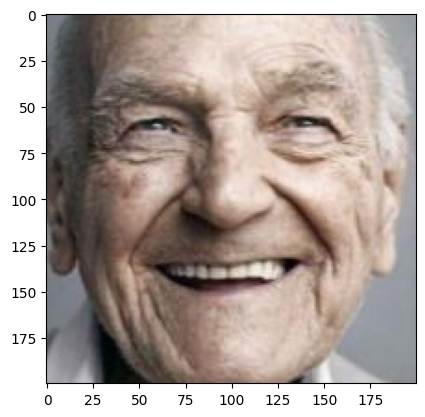

In [27]:
i = 1
plt.imshow(cv2.cvtColor(cv2.imread(df['Images'][i]), cv2.COLOR_BGR2RGB))
print(df['Ages'][i])

# Prepare Data

In [30]:
import seaborn as sns

C:\Users\Khodak\AppData\Local\Temp\ipykernel_6840\3401268525.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

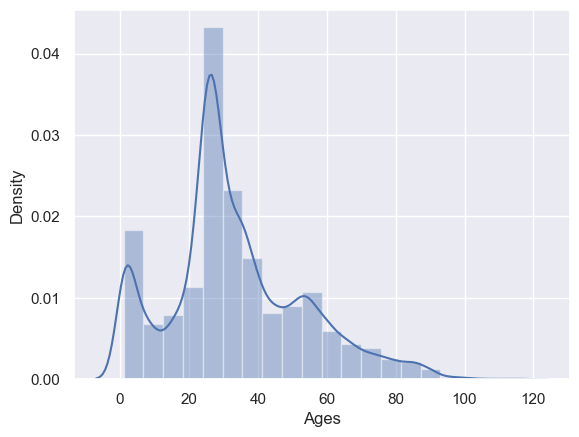

In [31]:
sns.set_theme()
sns.distplot(df['Ages'],kde=True, bins=20)

In [32]:
age1 = []

for i in range(len(df)):
    if df['Ages'].iloc[i] == 1:
        age1.append(df.iloc[i])

age1 = pd.DataFrame(age1)
age1 = age1.sample(frac=0.4)

df = df[df['Ages'] > 1]

df = pd.concat([df, age1], ignore_index = True)

C:\Users\Khodak\AppData\Local\Temp\ipykernel_6840\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

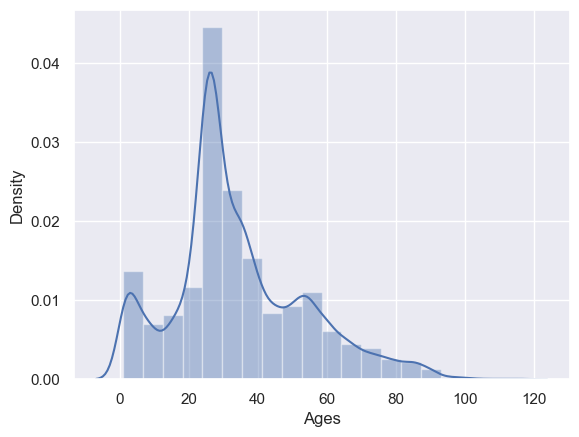

In [33]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [34]:
age26 = []

for i in range(len(df)):
    if df['Ages'].iloc[i] == 26:
        age26.append(df.iloc[i])

age26 = pd.DataFrame(age26)
age26 = age26.sample(frac=0.3)

df = df[df['Ages'] != 26]

df = pd.concat([df, age26], ignore_index = True)

C:\Users\Khodak\AppData\Local\Temp\ipykernel_6840\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

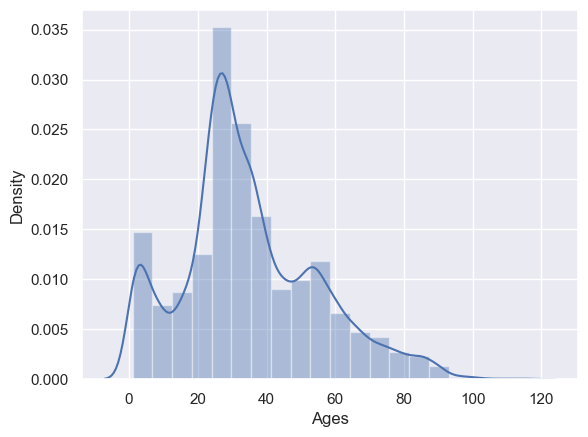

In [35]:
sns.distplot(df['Ages'],kde=True, bins=20)

In [37]:
df = df[df['Ages'] < 80]

C:\Users\Khodak\AppData\Local\Temp\ipykernel_6840\2749225890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ages'],kde=True, bins=20)


<Axes: xlabel='Ages', ylabel='Density'>

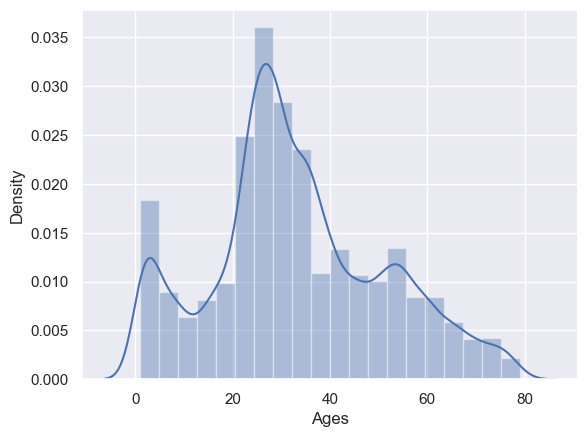

In [38]:
sns.distplot(df['Ages'],kde=True, bins=20)

# Split the Data

In [51]:
train_test_split??

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Source:   
def train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
):
    """Split arrays or matrices into random train and test subsets.

    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test s

In [49]:
from sklearn.model_selection import train_test_split

In [52]:
labels = df['Ages']
data = df['Images']

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Create CNN

# Train the Model

# Evaluate the Model